En este notebook se busca identificar qué región del mundo cuenta con el mercado más grande de videojuegos (cuánto dinero han gastado los consumidores en videojuegos), y qué tipo de videojuegos se debería desarrollar para que tenga el mayor impacto en dicha región.

In [2]:
#Se importan las librerias que se van a utilizar
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Se inicia sesion
spark = SparkSession.builder.appName("VentaVg").getOrCreate()

In [4]:
#Se crea df usando spark
sdf = spark.read.csv('hdfs://namenode:8020/user/hadoop/vgsales.csv', header=True, inferSchema=True)

In [6]:
#Se importa el csv y se crea un df
df = sdf.toPandas()
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int32  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


In [17]:
#Se eliminan los registros que tengan valores NaN en la columna de Years y se convierte a integer
df = df.dropna(subset=['Year'])
df = df[df['Year'] != 'N/A']

In [18]:
df['Year'].unique()

array(['2006', '1985', '2008', '2009', '1996', '1989', '1984', '2005',
       '1999', '2007', '2010', '2013', '2004', '1990', '1988', '2002',
       '2001', '2011', '1998', '2015', '2012', '2014', '1992', '1997',
       '1993', '1994', '1982', '2003', '1986', '2000', '1995', '2016',
       '1991', '1981', '1987', '1980', '1983', '2020', '2017'],
      dtype=object)

In [19]:
df['Year'] = df['Year'].astype(int)

In [20]:
#Se crea una lista que contenga solo los últimos 10 años registrados en el df
años_recientes = sorted(df['Year'].unique(), reverse=True)[:10]
años_recientes

[2020, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009]

In [21]:
#Se crea nuevo df con los ultimos 10 años
df_recientes = df[df['Year'].isin(años_recientes)]
df_recientes.sum()

Rank                                                     58292309
Name            Wii Sports ResortNew Super Mario Bros. WiiWii ...
Platform        WiiWiiWiiX360PS3X360DSX360X3603DSPS4PS3X360X36...
Year                                                     13227913
Genre           SportsPlatformSportsMiscActionActionRole-Playi...
Publisher       NintendoNintendoNintendoMicrosoft Game Studios...
NA_Sales                                                   1451.6
EU_Sales                                                  1030.46
JP_Sales                                                   360.68
Other_Sales                                                 344.5
Global_Sales                                              3188.15
dtype: object

In [22]:
#Se identifica la región que haya reportado la mayor cantidad de ventas
sum_reg = df_recientes[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
sum_reg

NA_Sales       1451.60
EU_Sales       1030.46
JP_Sales        360.68
Other_Sales     344.50
dtype: float64

In [23]:
#Se crea un df que contenga los 10 juegos más vendidos en NA en los últimos 10 años
bestSel_NA = df_recientes.sort_values('NA_Sales', ascending=False).head(10)

Se ha identificado que Norte América es el territorio en donde hay mayor gasto de capital por parte de los consumidores.

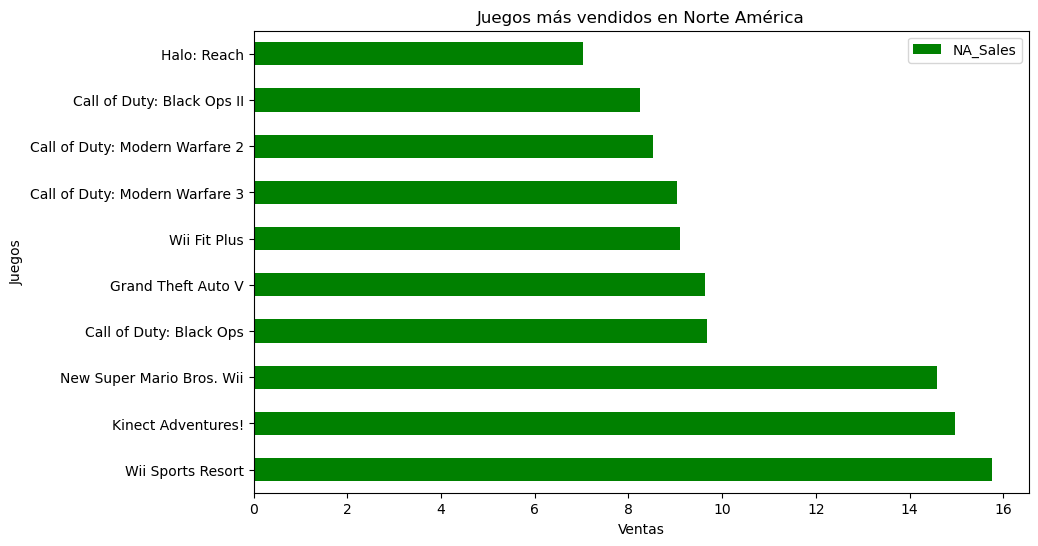

In [24]:
#Gráfica de barras de los juegos más vendidos
bestSel_NA.plot(kind='barh', x='Name', y='NA_Sales', color='green', figsize=(10, 6))
plt.title('Juegos más vendidos en Norte América')
plt.xlabel('Ventas')
plt.ylabel('Juegos')
plt.show()

In [25]:
#Se agrupan por género y plataforma las ventas en NA
na_gen = df_recientes.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)
na_plat = df_recientes.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False)

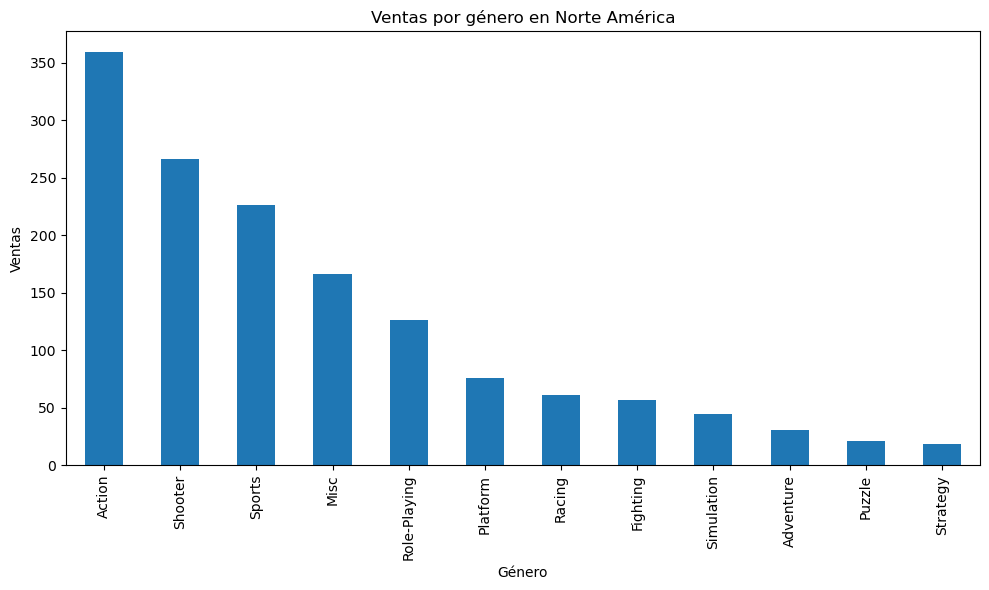

In [26]:
#Gráfica de barras de la venta por genero
na_gen.plot(kind='bar', figsize=(10, 6))
plt.title('Ventas por género en Norte América')
plt.xlabel('Género')
plt.ylabel('Ventas')
plt.tight_layout()
plt.show()

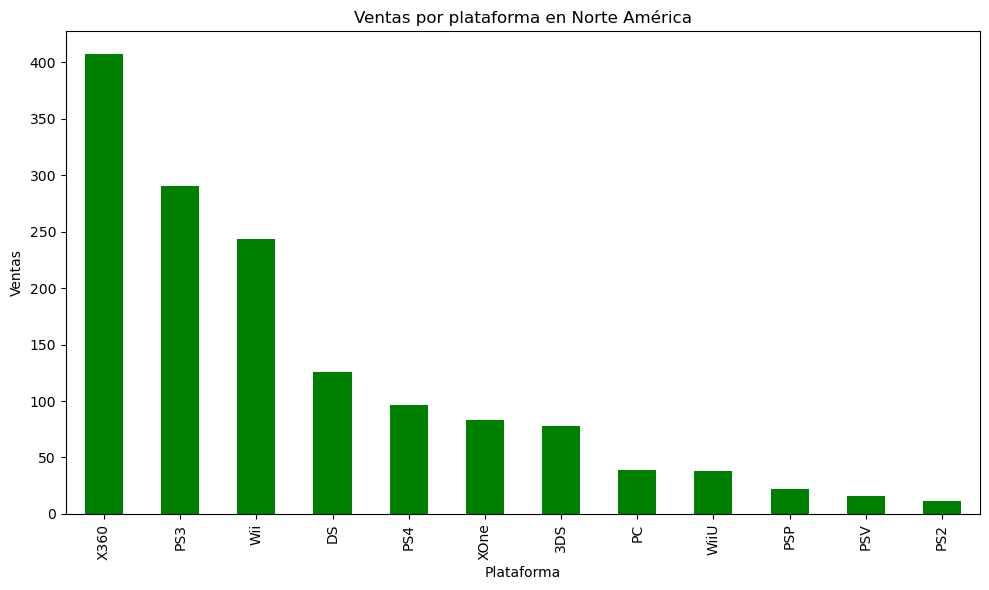

In [27]:
#Gráfica de barras de la venta por plataforma
na_plat.plot(kind='bar', color = 'green', figsize=(10, 6))
plt.title('Ventas por plataforma en Norte América')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.tight_layout()
plt.show()

De la lista de juegos más vendidos, la mitad son del **género shooter y acción**, esto lo podemos corroborar la gráfica de ventas por género, con esta información ya nos podemos enfocar en qué tipo de videojuego deberíamos enfocarnos en hacer.
Con las ventas por plataforma, podemos notar que la consola Xbox 360 cuenta con el primer lugar, seguido del Ps3 y Wii. Estas 3 consolas fueron revolucionarias por sus tecnologías en jugabilidad cooperativa (local y en línea), por lo que ahora sabemos que **el videojuego de acción/shooter debe tener modos de juego que insiten a la cooperación entre jugadores.**